In [43]:
%matplotlib inline
import proplot as pplt # plotting
import numpy as np # might be useful
import pandas as pd # for reading the csv files
import datetime as dt # for date handling
import cftime as cft # idk what the difference is here ... 
import xarray as xr
import Functions.readDat as rd # reading the files
import cartopy.feature as cfeature

In [44]:
ds_obs = xr.open_dataset('DATA/OBS_Clean/Michel_2021_NAA.nc')
ms_obs = xr.open_dataset('DATA/OBS_Clean/OBS_mask-mea.nc')

# load the dataset
yrs = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
op, da = rd.readDat_multiyear(yr = yrs, forcing = 'CGRF', file_end =None )
da = da.drop_vars(['time_counter_bnds','CO3',  'CO3sat', 'ExpCaCO3', 'Fedep', 'Kg', 'Nfix', 'Oflx', 'PAR', 'PMO', 'PMO2',
                   'Rnf', 'Rnf_dic', 'Rnf_no3', 'Rnf_tal',  'dmsflux', 'fstric', 'heup', 'iceairdicflux', 'icedia', 'icedms', 
                   'icedmspd', 'icedmspdrls', 'icedmsrls', 'icenh4', 'iceno3', 'icenpp', 'iceswdicflux', 'smsdms', 'smsdmspd', 
                   'CaCO3', 'NH4', 'O2', 'PHY2Fe', 'PHY2N', 'PHYFe', 'PHYN', 'dFe', 'dms','dmspd', 'no3', 'sobowlin','sohefldo', 
                   'sohefldp', 'soicecov', 'somixhgt', 'somxl010', 'sosafldp', 'sosalflx', 'sosaline', 'soshfldo', 'sossheig', 
                   'sosstsst', 'sowaflcd', 'sowafldp',  'sowaflup', 'sowindsp'])
#da = da.compute() # reduce time to write things later
da


<xarray.Dataset>
Dimensions:       (time_counter: 108, y: 400, x: 568, deptht: 46)
Coordinates:
  * deptht        (deptht) float32 0.5487 1.973 3.92 ... 5.622e+03 5.878e+03
    nav_lat       (y, x) float32 dask.array<chunksize=(400, 568), meta=np.ndarray>
    nav_lon       (y, x) float32 dask.array<chunksize=(400, 568), meta=np.ndarray>
  * time_counter  (time_counter) object 2011-01-16 05:00:00 ... 2019-12-16 19...
Dimensions without coordinates: y, x
Data variables: (12/19)
    Cflx          (time_counter, y, x) float32 dask.array<chunksize=(12, 400, 568), meta=np.ndarray>
    Delc          (time_counter, y, x) float32 dask.array<chunksize=(12, 400, 568), meta=np.ndarray>
    PH            (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 46, 400, 568), meta=np.ndarray>
    PPPHY         (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 46, 400, 568), meta=np.ndarray>
    PPPHY2        (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 46, 400, 568), meta=np.ndarray>
    pCO2_atm      (time_counter, y, x) float32 dask.array<chunksize=(12, 400, 568), meta=np.ndarray>
    ...            ...
    ZOO           (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 46, 400, 568), meta=np.ndarray>
    ZOO2          (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 46, 400, 568), meta=np.ndarray>
    alk           (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 46, 400, 568), meta=np.ndarray>
    dic           (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 46, 400, 568), meta=np.ndarray>
    vosaline      (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 46, 400, 568), meta=np.ndarray>
    votemper      (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 46, 400, 568), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.1
    production:   An IPSL model
    TimeStamp:    22/11/2020 17:20:54 -0500
    file_name:    NAA_730h_20110101_20111231_diad_T.nc
    history:      Sun Nov 22 17:29:50 2020: ncks -4 -L 1 -O NAA_730h_20110101...
    NCO:          4.6.6

In [45]:
# I want to get a list of OBS in Amundsen Gulf 
# read the mask for the ecoregions
ecom = xr.open_dataset('DATA/subsum_canoe-dmsv5.10.exp00_iicethic.nc')
ecom = ecom.sel(mm = [7], drop = True ).squeeze()
ecom

<xarray.Dataset>
Dimensions:  (y: 400, x: 568, n: 20, t: 564)
Dimensions without coordinates: y, x, n, t
Data variables:
    mmask    (y, x) float64 ...
    sdat     (n, t) float64 ...
    sk       (n) float64 ...
    sv       (n) float64 ...

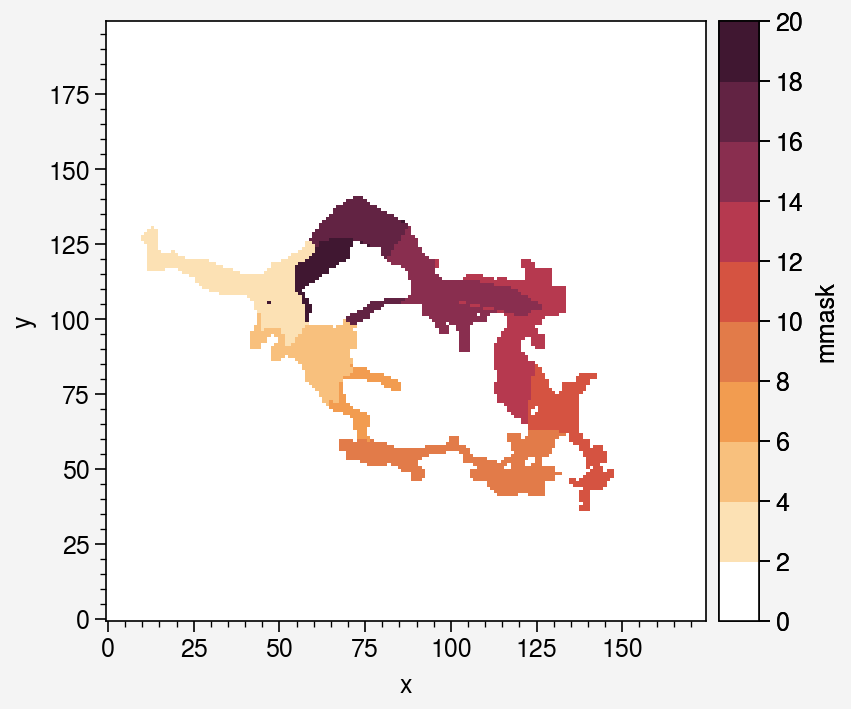

In [46]:
fig, axm = pplt.subplots(axwidth=3, axheight=3)#, proj=proj)#, tight=True)
axm.pcolormesh(ecom.mmask[:200,100:275], colorbar = True)

In [47]:
ecom.mmask[100,150].values

array(4.)

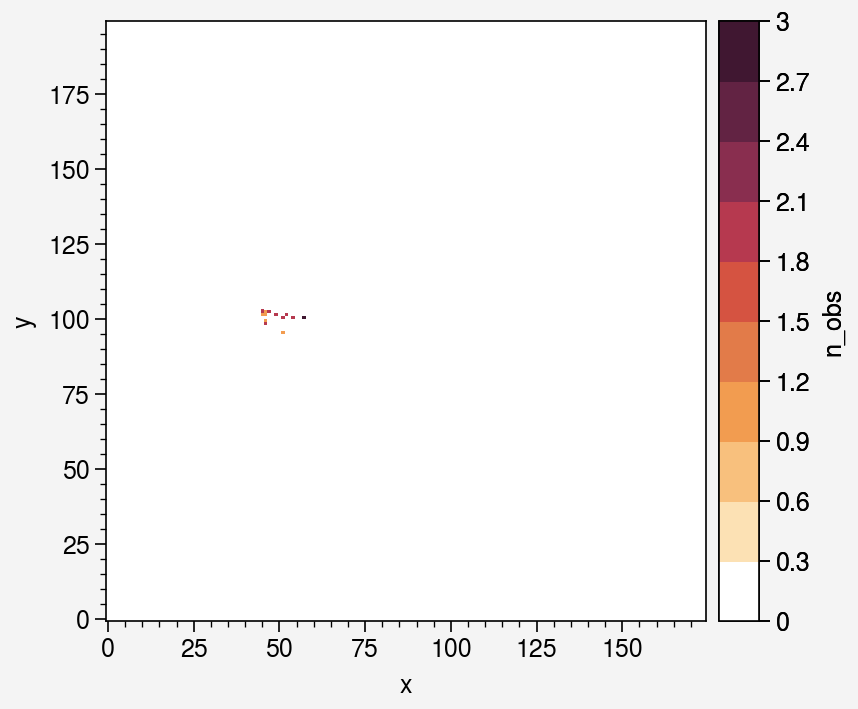

In [48]:
mask = ms_obs.where(ecom.mmask==4)
fig, axm = pplt.subplots(axwidth=3, axheight=3)#, proj=proj)#, tight=True)
axm.pcolormesh(mask.n_obs[:200,100:275], colorbar = True)

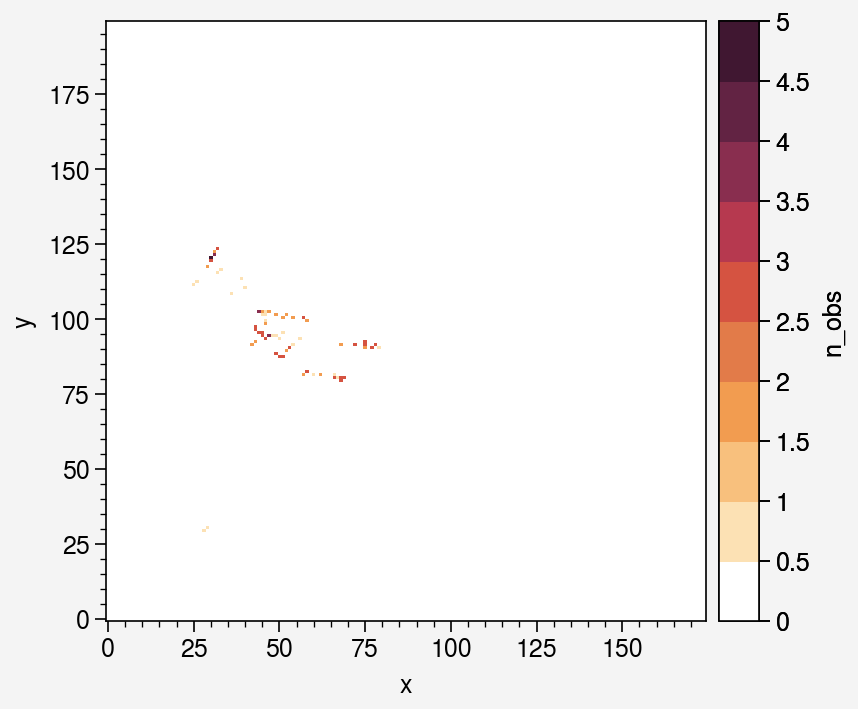

In [49]:
fig, axm = pplt.subplots(axwidth=3, axheight=3)#, proj=proj)#, tight=True)
axm.pcolormesh(ms_obs.n_obs[:200,100:275], colorbar = True)

In [50]:
lop =  ms_obs.stack(z = ('x', 'y')) # list of points
nps =  da.stack(z = ('x', 'y')) # naa -points

# reduce empty cells
lop = lop.where(lop.n_obs != 0, drop = True)
nps = nps.where(lop.n_obs != 0, drop = True)

lop

/home/jlanger/anaconda3/envs/jos_env_3-9/lib/python3.9/site-packages/xarray/core/dataset.py:3922: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explictly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  result = result._stack_once(dims, new_dim)
/home/jlanger/anaconda3/envs/jos_env_3-9/lib/python3.9/site-packages/xarray/core/dataset.py:3922: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid

<xarray.Dataset>
Dimensions:  (z: 67)
Coordinates:
    nav_lon  (z) float64 -133.9 -133.9 -120.0 -119.9 ... -116.6 -116.5 -116.0
    nav_lat  (z) float64 69.91 70.06 63.69 63.82 ... 71.44 71.35 71.49 71.44
  * z        (z) MultiIndex
  - x        (z) int64 125 126 128 129 129 130 130 ... 175 175 175 177 178 179
  - y        (z) int64 112 113 30 31 118 120 121 122 ... 81 92 91 92 93 91 92 91
Data variables:
    mask     (z) object 'none ; 2018-08_CBS-MEA_CDT_KUG_01' ... 'none ; 2018-...
    n_obs    (z) float64 1.0 1.0 1.0 1.0 2.0 3.0 5.0 ... 2.0 3.0 3.0 3.0 3.0 1.0
Attributes:
    script:               created with create_obs_mask.ipynb -- JLanger
    cluster:              Aeolus - Uvic
    creation Date--time:  2022-10-28 12:01:15.435714

In [51]:
print(lop.nav_lon[10])
print(nps.nav_lon[10])
# This seems to be exactly what I was intending to do :party_face:

<xarray.DataArray 'nav_lon' ()>
array(-135.16716003)
Coordinates:
    nav_lon  float64 -135.2
    nav_lat  float64 71.35
    z        object (132, 124)
<xarray.DataArray 'nav_lon' ()>
array(-135.16716, dtype=float32)
Coordinates:
    z        object (132, 124)
    nav_lat  float32 71.35
    nav_lon  float32 -135.2
Attributes:
    standard_name:  longitude
    units:          degrees_east
    valid_min:      -179.99947
    valid_max:      179.99419
    long_name:      Longitude
    nav_model:      Default grid


In [52]:
# Now: For every cell in lop: 
# extract the list of stations -> s_list
# Get the data for each Station in s_list from the OBS
# Get Data for that Gridcell from NAA (both time and spatial)

# For analysis: take the error-term: (Model [y] - OBS [x]) -> ((y-x))

# save both with the Dimension Station_ID 

## getting the list of Stations
iz = 0 # index along z axis
N = lop.mask[iz].values
n = str(N).split(';')
nlist = n[1:]   # The first entry _should_ always be 'none'
nlist[0] = nlist[0].replace(' ','')   # make this run through every entry in the list


In [53]:
stat_obs = ds_obs.sel(Station = nlist[0]) 
#Voila: a dataset of the Observations


In [54]:
stat_obs.Date.values

array('2018-08-03 00:00:00', dtype='<U19')

In [55]:
# now select the NAA-gridcell.
M = nps.isel(z = iz)

ti = pd.to_datetime(str(stat_obs.Date.values)) # get the time-index
#ti
M = M.sel(time_counter = cft.DatetimeNoLeap(ti.year, ti.month, 15, 5, 0, 0, 0, has_year_zero=True), 
          method = 'nearest')
M

<xarray.Dataset>
Dimensions:       (deptht: 46)
Coordinates:
    z             object (125, 112)
  * deptht        (deptht) float32 0.5487 1.973 3.92 ... 5.622e+03 5.878e+03
    nav_lat       float32 69.91
    nav_lon       float32 -133.9
    time_counter  object 2018-08-17 03:00:00
Data variables: (12/19)
    Cflx          float32 dask.array<chunksize=(), meta=np.ndarray>
    Delc          float32 dask.array<chunksize=(), meta=np.ndarray>
    PH            (deptht) float32 dask.array<chunksize=(46,), meta=np.ndarray>
    PPPHY         (deptht) float32 dask.array<chunksize=(46,), meta=np.ndarray>
    PPPHY2        (deptht) float32 dask.array<chunksize=(46,), meta=np.ndarray>
    pCO2_atm      float32 dask.array<chunksize=(), meta=np.ndarray>
    ...            ...
    ZOO           (deptht) float32 dask.array<chunksize=(46,), meta=np.ndarray>
    ZOO2          (deptht) float32 dask.array<chunksize=(46,), meta=np.ndarray>
    alk           (deptht) float32 dask.array<chunksize=(46,), meta=np.ndarray>
    dic           (deptht) float32 dask.array<chunksize=(46,), meta=np.ndarray>
    vosaline      (deptht) float32 dask.array<chunksize=(46,), meta=np.ndarray>
    votemper      (deptht) float32 dask.array<chunksize=(46,), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.1
    production:   An IPSL model
    TimeStamp:    22/11/2020 17:20:54 -0500
    file_name:    NAA_730h_20110101_20111231_diad_T.nc
    history:      Sun Nov 22 17:29:50 2020: ncks -4 -L 1 -O NAA_730h_20110101...
    NCO:          4.6.6

In [58]:
stat_obs

<xarray.Dataset>
Dimensions:     (NAA_deptht: 46)
Coordinates:
  * NAA_deptht  (NAA_deptht) float64 0.5487 1.973 3.92 ... 5.622e+03 5.878e+03
    Station     <U26 '2018-08_CBS-MEA_CDT_KUG_01'
Data variables: (12/24)
    Depth       (NAA_deptht) float64 ...
    Sample      (NAA_deptht) float64 ...
    Pressure    (NAA_deptht) float64 ...
    Temp_C      (NAA_deptht) float64 ...
    DO          (NAA_deptht) float64 ...
    Sal         (NAA_deptht) float64 ...
    ...          ...
    lonmax      float64 ...
    latmin      float64 ...
    lonmin      float64 ...
    lons        float64 ...
    lats        float64 ...
    Stat_id     object ...
Attributes:
    script:               created with Michel_to_NAA_nc.ipynb -- JLanger
    cluster:              Aeolus - Uvic
    creation Date--time:  2022-10-25 13:11:27.242188
    Data-source:          Christine Michel
    Note:                 Citation not clear, might not be published yet

In [62]:
#(Model [y] - OBS [x]) -> ((y-x))
error_ds = xr.Dataset({'E_Sal': (['deptht'], (M.vosaline.values - stat_obs.Sal.values)) },
                      coords = {'deptht': M.deptht})
error_ds['E_Temp'] = (['deptht'], (M.votemper.values - stat_obs.Temp_C.values))

error_ds
# bliss, it just works :)


# Now make it a function or something, -> get every data-point.

<xarray.Dataset>
Dimensions:       (deptht: 46)
Coordinates:
    z             object (125, 112)
    nav_lat       float32 69.91
    nav_lon       float32 -133.9
    time_counter  object 2018-08-17 03:00:00
  * deptht        (deptht) float32 0.5487 1.973 3.92 ... 5.622e+03 5.878e+03
Data variables:
    E_Sal         (deptht) float64 3.013 3.023 3.042 ... -28.95 -28.95 -28.95
    E_Temp        (deptht) float64 -3.593 -3.571 -3.535 ... -0.5447 -0.5447

In [ ]:
out_ds = xr.Dataset({'mask': (['y','x'], mask),
                     'n_obs': (['y','x'], n_obs)},
            coords = {'nav_lon': ncds.nav_lon,
                      'nav_lat': ncds.nav_lat}, 
            attrs={'script': 'created with create_obs_mask.ipynb -- JLanger',
             'cluster': 'Aeolus - Uvic',
              'creation Date--time': str(datetime.now())})